![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

### Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [ ]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<AxesSubplot:title={'center':'Sentimientos por aerolínea'}, xlabel='airline'>

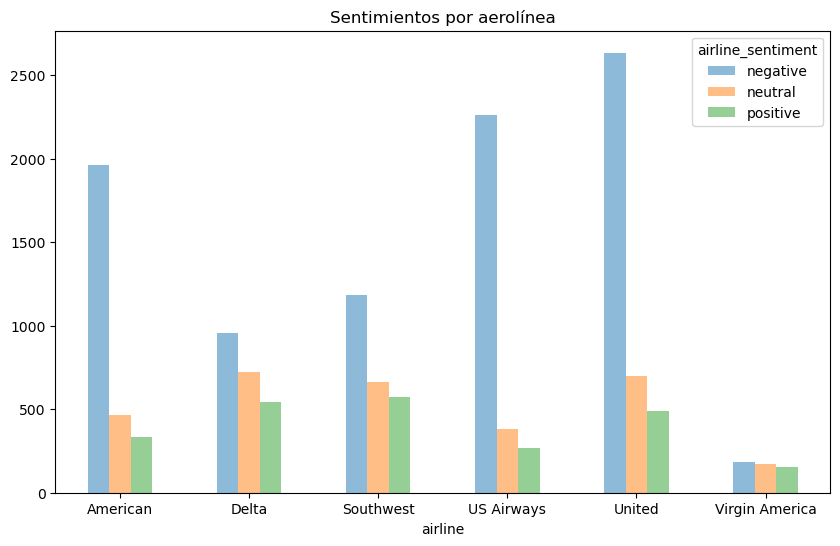

In [ ]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=False,title="Sentimientos por aerolínea")

La exploración del conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter muestra que la mayoría de éstos son de tendencia negativa para todas las aerolíneas, la que más sentimientos negativos despierta es United, mientras que Virgin America con menos participación, muestra menor reacción negativa. 

### *Librerías* y Variables de interés y predicción

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer, f1_score, precision_score, recall_score, classification_report,confusion_matrix
import seaborn as sns
from sklearn import metrics

In [ ]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [ ]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Se elimina el tweet_id porque no aporta en nada al problema
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

El error de clasificación para el Random Forest en la muestra de test es:
0.22889072847681668

El Accuracy del Modelo RF es: 0.7711
Precision_RF:  0.7682
Recall_RF: 0.6114
F score_RF: 0.6563



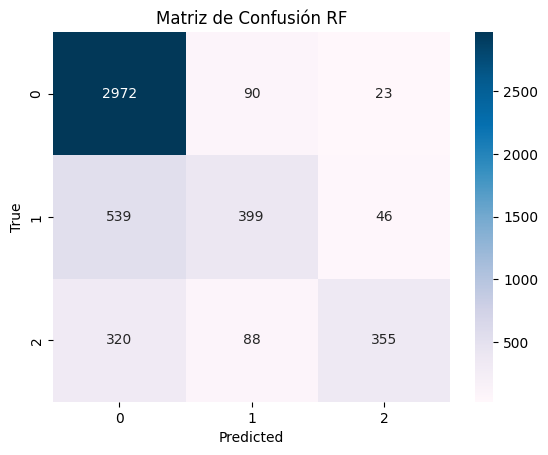

In [ ]:
# Celda 1

# Vectorización del texto
vectorizer1 = CountVectorizer()
X_train_vectorized1 = vectorizer1.fit_transform(X_train)
X_test_vectorized1 = vectorizer1.transform(X_test)

# Ajustar un modelo de Random Forest en el conjunto de entrenamiento
clfRF1 = RandomForestClassifier(random_state=42)
clfRF1.fit(X_train_vectorized1, y_train)

# Predecir la variable de respuesta en el conjunto de prueba
y_pred1 = clfRF1.predict(X_test_vectorized1)

# Calculamos el error de predicción para el modelo - Random Forest
errorRF=0
#y_test = y_test.to_numpy()
for i in range(0,len(y_test)):
    if(y_test[i]!=y_pred1[i]):
        errorRF+=1/len(y_test)
        
print('El error de clasificación para el Random Forest en la muestra de test es:')
print(errorRF)


print("")
# Se calcula el Accuracy del modelo
accuracy_RF1 = accuracy_score(y_test, y_pred1)
print(f'El Accuracy del Modelo RF es: {accuracy_RF1:.4f}')

# Precision
precision_RF1=precision_score(y_test, y_pred1,average='macro')
print(f'Precision_RF:  {precision_RF1:.4f}')


# Sensibilidad
recall_RF1=metrics.recall_score(y_test, y_pred1,average='macro')
print(f'Recall_RF: {recall_RF1:.4f}')

#F1 Score
f1_score_RF1 = f1_score(y_test,y_pred1,average='macro')
print(f'F score_RF: {f1_score_RF1:.4f}')

print("")
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión RF')
plt.show()

Se construye un modelo de Random Forest para predecir el sentimiento de los tweets usando los datos de training. Luego se utiliza la función CountVectorizer y se evalúa el desempeño del modelo en los datos de test utilizando diferentes métricas.

Después de entrenar el modelo y realizar las predicciones, se obtiene un accuracy del 77.11% y un F1 score de 0.6563.

El accuracy del 77.11% indica que el modelo clasifica correctamente el 77.11% de los casos, pero hay margen para mejorarlo. El F1 score (que combina la precisión y la sensibilidad, proporcionando una visión más equilibrada del rendimiento del modelo al considerar falsos positivos y negativos) es de 0.6563, lo que sugiere que el modelo tiene un desempeño moderado en términos de equilibrio entre la precisión y la sensibilidad, y podría mejorarse ajustando los parámetros del modelo o explorando diferentes técnicas de vectorización.

Ahora, se crea la matriz con las palabras como vienen de la fuente (conservando mayúsculas y minúsculas) para evaluar la diferencia en la métrica de desempeño y verificar si mejora.

El error de clasificación para el Random Forest en la muestra de test es:
0.2371688741721807

El Accuracy del Modelo RF es: 0.7628
Precision_RF:  0.7564
Recall_RF: 0.5959
F score_RF: 0.6397



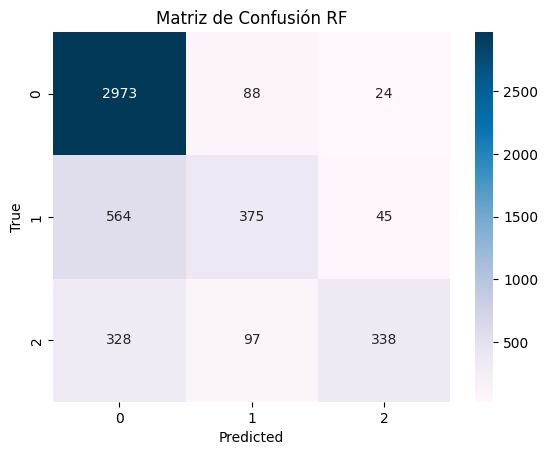

In [ ]:
# Vectorización del texto
vectorizer2 = CountVectorizer(lowercase=False)
X_train_vectorized2 = vectorizer2.fit_transform(X_train)
X_test_vectorized2 = vectorizer2.transform(X_test)

# Ajustar un modelo de Random Forest en el conjunto de entrenamiento
clfRF2 = RandomForestClassifier(random_state=42)
clfRF2.fit(X_train_vectorized2, y_train)

# Predecir la variable de respuesta en el conjunto de prueba
y_pred2 = clfRF2.predict(X_test_vectorized2)

# Calculamos el error de predicción para el modelo - Random Forest
errorRF=0
#y_test = y_test.to_numpy()
for i in range(0,len(y_test)):
    if(y_test[i]!=y_pred2[i]):
        errorRF+=1/len(y_test)
        
print('El error de clasificación para el Random Forest en la muestra de test es:')
print(errorRF)


print("")
# Se calcula el Accuracy del modelo
accuracy_RF2 = accuracy_score(y_test, y_pred2)
print(f'El Accuracy del Modelo RF es: {accuracy_RF2:.4f}')

# Precision
precision_RF2=precision_score(y_test, y_pred2,average='macro')
print(f'Precision_RF:  {precision_RF2:.4f}')


# Sensibilidad
recall_RF2=metrics.recall_score(y_test, y_pred2,average='macro')
print(f'Recall_RF: {recall_RF2:.4f}')

#F1 Score
f1_score_RF2 = f1_score(y_test,y_pred2,average='macro')
print(f'F score_RF: {f1_score_RF2:.4f}')

print("")
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión RF')
plt.show()

| Punto  | Modelo                                             | Accuracy |F1_Score |
|--------|----------------------------------------------------|----------|----------|
|    1   | Random Forest (CountVectorizer)                    |  0.7711  |  0.6563    |
|    1   | Random Forest (CountVectorizer (lowercase=False))  |  0.7628  |  0.6397    |

Los resultados mostrados en la tabla indican que el modelo Random Forest con CountVectorizer tiene un mejor rendimiento en términos de Accuracy y F1 Score en comparación con el modelo Random Forest con CountVectorizer (lowercase=False).

El hecho de que el modelo que conserva la capitalización del texto tenga un peor rendimiento puede deberse a que las mismas palabras escritas con mayúsculas o minúsculas pueden ser consideradas diferentes por el modelo, lo que puede resultar en una pérdida de información valiosa en el texto. Por otro lado, el modelo que convierte todo el texto a minúsculas puede tener un mejor rendimiento porque no hay distinción entre palabras escritas con mayúsculas y minúsculas, lo que puede aumentar su precisión.

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

El error de clasificación para el Random Forest en la muestra de test es:
0.2382036423841012

El Accuracy del Modelo RF es: 0.7618
Precision_RF:  0.7014
Recall_RF: 0.6609
F score_RF: 0.6782



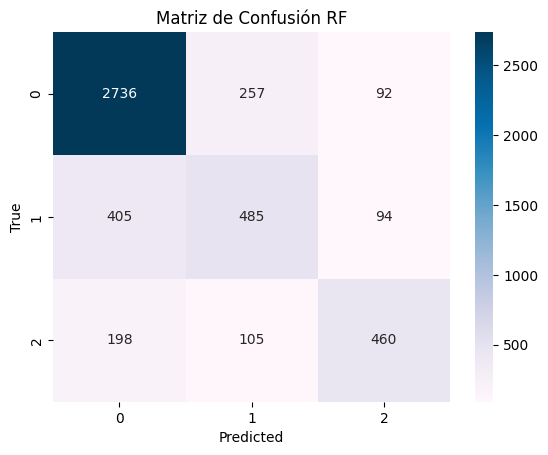

In [ ]:
# Celda 2

# Vectorización del texto
vectorizer3 = CountVectorizer(stop_words='english')
X_train_vectorized3 = vectorizer3.fit_transform(X_train)
X_test_vectorized3 = vectorizer3.transform(X_test)

# Ajustar un modelo de Random Forest en el conjunto de entrenamiento
clfRF3 = RandomForestClassifier(random_state=42)
clfRF3.fit(X_train_vectorized3, y_train)

# Predecir la variable de respuesta en el conjunto de prueba
y_pred3 = clfRF3.predict(X_test_vectorized3)

# Calculamos el error de predicción para el modelo - Random Forest
errorRF=0
#y_test = y_test.to_numpy()
for i in range(0,len(y_test)):
    if(y_test[i]!=y_pred3[i]):
        errorRF+=1/len(y_test)
        
print('El error de clasificación para el Random Forest en la muestra de test es:')
print(errorRF)


print("")
# Se calcula el Accuracy del modelo
accuracy_RF3 = accuracy_score(y_test, y_pred3)
print(f'El Accuracy del Modelo RF es: {accuracy_RF3:.4f}')

# Precision
precision_RF3=precision_score(y_test, y_pred3,average='macro')
print(f'Precision_RF:  {precision_RF3:.4f}')


# Sensibilidad
recall_RF3=metrics.recall_score(y_test, y_pred3,average='macro')
print(f'Recall_RF: {recall_RF3:.4f}')

#F1 Score
f1_score_RF3 = f1_score(y_test,y_pred3,average='macro')
print(f'F score_RF: {f1_score_RF3:.4f}')

print("")
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión RF')
plt.show()

Se agrega una nueva variante al proceso de vectorización utilizando la función CountVectorizer. Esta vez, se elimina el uso de las "stopwords" (palabras vacías) en inglés al vectorizar el texto. El objetivo es explorar si la eliminación de estas palabras comunes pero con poca información relevante tiene un impacto en el rendimiento del modelo de Random Forest al predecir el sentimiento de los tweets.

Al entrenar el modelo y realizar las predicciones después de eliminar las stopwords, se obtiene un accuracy del 76.18% y un F1 score de 0.6782.

Comparado con el modelo original, el accuracy disminuye ligeramente y el F1 score aumenta. Esto sugiere que la eliminación de stopwords tiene un impacto moderado en el equilibrio entre la precisión y la sensibilidad del modelo. Puede ser útil evaluar la eliminación de stopwords junto con otros ajustes en la vectorización para mejorar aún más el rendimiento del modelo.

Ahora, se crea la matriz con las palabras como vienen de la fuente (conservando mayúsculas y minúsculas) para evaluar la diferencia en la métrica de desempeño y verificar si mejora.

El error de clasificación para el Random Forest en la muestra de test es:
0.2371688741721807

El Accuracy del Modelo RF es: 0.7628
Precision_RF:  0.7015
Recall_RF: 0.6520
F score_RF: 0.6723



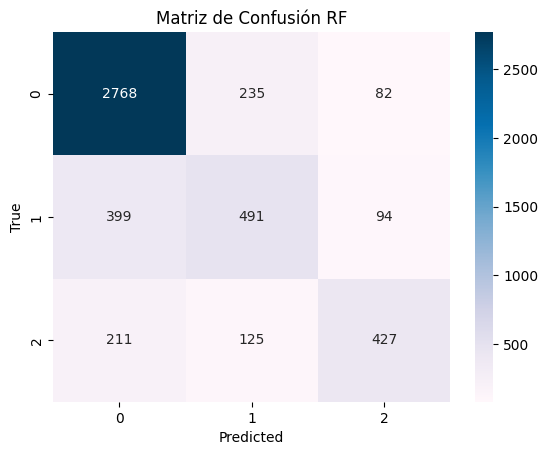

In [ ]:
# Vectorización del texto
vectorizer4 = CountVectorizer(stop_words='english',lowercase=False)
X_train_vectorized4 = vectorizer4.fit_transform(X_train)
X_test_vectorized4 = vectorizer4.transform(X_test)

# Ajustar un modelo de Random Forest en el conjunto de entrenamiento
clfRF4 = RandomForestClassifier(random_state=42)
clfRF4.fit(X_train_vectorized4, y_train)

# Predecir la variable de respuesta en el conjunto de prueba
y_pred4 = clfRF4.predict(X_test_vectorized4)

# Calculamos el error de predicción para el modelo - Random Forest
errorRF=0
#y_test = y_test.to_numpy()
for i in range(0,len(y_test)):
    if(y_test[i]!=y_pred4[i]):
        errorRF+=1/len(y_test)
        
print('El error de clasificación para el Random Forest en la muestra de test es:')
print(errorRF)


print("")
# Se calcula el Accuracy del modelo
accuracy_RF4 = accuracy_score(y_test, y_pred4)
print(f'El Accuracy del Modelo RF es: {accuracy_RF4:.4f}')

# Precision
precision_RF4=precision_score(y_test, y_pred4,average='macro')
print(f'Precision_RF:  {precision_RF4:.4f}')


# Sensibilidad
recall_RF4=metrics.recall_score(y_test, y_pred4,average='macro')
print(f'Recall_RF: {recall_RF4:.4f}')

#F1 Score
f1_score_RF4 = f1_score(y_test,y_pred4,average='macro')
print(f'F score_RF: {f1_score_RF4:.4f}')

print("")
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred4)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión RF')
plt.show()

| Punto  | Modelo                                             | Accuracy |F1_Score |
|--------|----------------------------------------------------|----------|----------|
|    1   | Random Forest (CountVectorizer)                    |  0.7711  |  0.6563    |
|    1   | Random Forest (CountVectorizer (lowercase=False))  |  0.7628  |  0.6397    |
|    2   | Random Forest (CountVectorizer(stop_words='english'))                    |  0.7618  |  0.6782    |
|    2   | Random Forest (CountVectorizer (stop_words='english',lowercase=False))  |  0.7628  |  0.6723    |

Los resultados mostrados en la tabla indican que el modelo Random Forest con CountVectorizer y eliminación de stopwords tiene un rendimiento practicamente igual en términos de Accuracy y F1 Score al modelo Random Forest con CountVectorizer y eliminación de stopwords (lowercase=False).

El hecho de que el modelo que conserva la capitalización del texto no tenga un mejor rendimiento puede deberse a que las mismas palabras escritas con mayúsculas o minúsculas pueden ser consideradas diferentes por el modelo, lo que puede resultar en una pérdida de información valiosa en el texto. 

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

[nltk_data] Downloading package wordnet to /root/nltk_data...


El error de clasificación para el Random Forest en la muestra de test es:
0.2444122516556242

El Accuracy del Modelo RF es: 0.7556
Precision_RF:  0.7573
Recall_RF: 0.5803
F score_RF: 0.6247



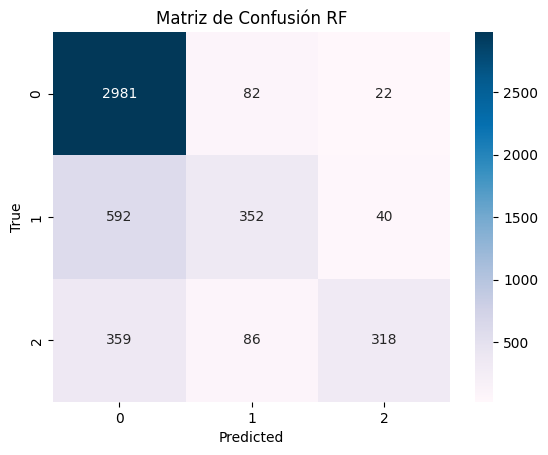

In [ ]:
# Celda 3

# Importación de librerias
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]

# Vectorización del texto
vectorizer5 = CountVectorizer(analyzer=split_into_lemmas)
X_train_vectorized5 = vectorizer5.fit_transform(X_train)
X_test_vectorized5 = vectorizer5.transform(X_test)

# Ajustar un modelo de Random Forest en el conjunto de entrenamiento
clfRF5 = RandomForestClassifier(random_state=42)
clfRF5.fit(X_train_vectorized5, y_train)

# Predecir la variable de respuesta en el conjunto de prueba
y_pred5 = clfRF5.predict(X_test_vectorized5)

# Calculamos el error de predicción para el modelo - Random Forest
errorRF=0
#y_test = y_test.to_numpy()
for i in range(0,len(y_test)):
    if(y_test[i]!=y_pred5[i]):
        errorRF+=1/len(y_test)
        
print('El error de clasificación para el Random Forest en la muestra de test es:')
print(errorRF)


print("")
# Se calcula el Accuracy del modelo
accuracy_RF5 = accuracy_score(y_test, y_pred5)
print(f'El Accuracy del Modelo RF es: {accuracy_RF5:.4f}')

# Precision
precision_RF5=precision_score(y_test, y_pred5,average='macro')
print(f'Precision_RF:  {precision_RF5:.4f}')


# Sensibilidad
recall_RF5=metrics.recall_score(y_test, y_pred5,average='macro')
print(f'Recall_RF: {recall_RF5:.4f}')

#F1 Score
f1_score_RF5 = f1_score(y_test,y_pred5,average='macro')
print(f'F score_RF: {f1_score_RF5:.4f}')

print("")
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión RF')
plt.show()

| Punto  | Modelo                                             | Accuracy |F1_Score |
|--------|----------------------------------------------------|----------|----------|
|    1   | Random Forest (CountVectorizer)                    |  0.7711  |  0.6563    |
|    1   | Random Forest (CountVectorizer (lowercase=False))  |  0.7628  |  0.6397    |
|    2   | Random Forest (CountVectorizer(stop_words='english'))                    |  0.7618  |  0.6782    |
|    2   | Random Forest (CountVectorizer (stop_words='english',lowercase=False))  |  0.7628  |  0.6723    |
|    3   | Random Forest (CountVectorizer (analyzer=split_into_lemmas))  |  0.7556  |  0.6247    |

En este punto, se introduce otro cambio en la vectorización del texto usando la función CountVectorizer. Ahora hace lematización para  reducir las palabras a su forma base o raíz, lo que permite unificar palabras con significados similares en una sola forma y mejorar la precisión del modelo.

Después de lematizar el texto y entrenar el modelo de Random Forest, se obtiene un accuracy del 75.56% y un F1 score de 0.6247.

Comparado con el modelo original, tanto el accuracy como el F1 score disminuyen. Esto indica que la lematización con verbos no mejora significativamente el rendimiento del modelo en este caso. Sin embargo, esto no descarta la posibilidad de que otras técnicas de preprocesamiento de texto, combinadas con la lematización, puedan llevar a una mejora en el rendimiento del modelo. 

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

El error de clasificación para el Random Forest en la muestra de test es:
0.2444122516556242

El Accuracy del Modelo RF es: 0.7556
Precision_RF:  0.7573
Recall_RF: 0.5803
F score_RF: 0.6247



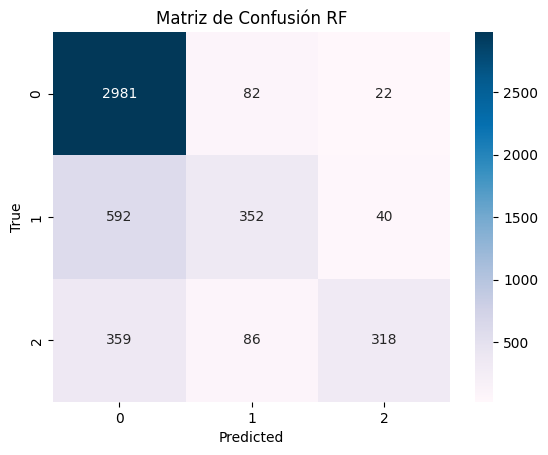

In [ ]:
# Celda 4

# Vectorización del texto
vectorizer6 = CountVectorizer(stop_words='english',analyzer=split_into_lemmas)
X_train_vectorized6 = vectorizer6.fit_transform(X_train)
X_test_vectorized6 = vectorizer6.transform(X_test)

# Ajustar un modelo de Random Forest en el conjunto de entrenamiento
clfRF6 = RandomForestClassifier(random_state=42)
clfRF6.fit(X_train_vectorized6, y_train)

# Predecir la variable de respuesta en el conjunto de prueba
y_pred6 = clfRF6.predict(X_test_vectorized6)

# Calculamos el error de predicción para el modelo - Random Forest
errorRF=0
#y_test = y_test.to_numpy()
for i in range(0,len(y_test)):
    if(y_test[i]!=y_pred6[i]):
        errorRF+=1/len(y_test)
        
print('El error de clasificación para el Random Forest en la muestra de test es:')
print(errorRF)


print("")
# Se calcula el Accuracy del modelo
accuracy_RF6 = accuracy_score(y_test, y_pred6)
print(f'El Accuracy del Modelo RF es: {accuracy_RF6:.4f}')

# Precision
precision_RF6=precision_score(y_test, y_pred6,average='macro')
print(f'Precision_RF:  {precision_RF6:.4f}')


# Sensibilidad
recall_RF6=metrics.recall_score(y_test, y_pred6,average='macro')
print(f'Recall_RF: {recall_RF6:.4f}')

#F1 Score
f1_score_RF6 = f1_score(y_test,y_pred6,average='macro')
print(f'F score_RF: {f1_score_RF6:.4f}')

print("")
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred6)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión RF')
plt.show()

| Punto  | Modelo                                             | Accuracy |F1_Score |
|--------|----------------------------------------------------|----------|----------|
|    1   | Random Forest (CountVectorizer)                    |  0.7711  |  0.6563    |
|    1   | Random Forest (CountVectorizer (lowercase=False))  |  0.7628  |  0.6397    |
|    2   | Random Forest (CountVectorizer(stop_words='english'))                    |  0.7618  |  0.6782    |
|    2   | Random Forest (CountVectorizer (stop_words='english',lowercase=False))  |  0.7628  |  0.6723    |
|    3   | Random Forest (CountVectorizer (analyzer=split_into_lemmas))  |  0.7556  |  0.6247    |
|    4   | Random Forest (CountVectorizer (stop_words='english',analyzer=split_into_lemmas))  |  0.7556  |  0.6247    |

En este punto, se combina la eliminación de stopwords y la lematización  en el proceso de vectorización del texto usando la función CountVectorizer. Con estas  técnicas de preprocesamiento combinadas, se entrena de nuevo un nuevo modelo de Random Forest y se evalúa su rendimiento.

Después de aplicar la eliminación de stopwords y la lematización con verbos, se obtiene un accuracy del 75.56% y un F1 score de 0.6247.

Al comparar estos resultados con los modelos anteriores, parece que la combinación de la eliminación de stopwords y la lematización no mejora significativamente el rendimiento del modelo. El accuracy y el F1 score son muy similares a los obtenidos en el modelo donde se lematiza el texto solamente.

A pesar de que la combinación de estas técnicas no condujo a un aumento significativo en el rendimiento del modelo, es posible que ajustando los parámetros del modelo de Random Forest o explorando otras técnicas de preprocesamiento, se pueda mejorar la precisión y el equilibrio entre precisión y sensibilidad.

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

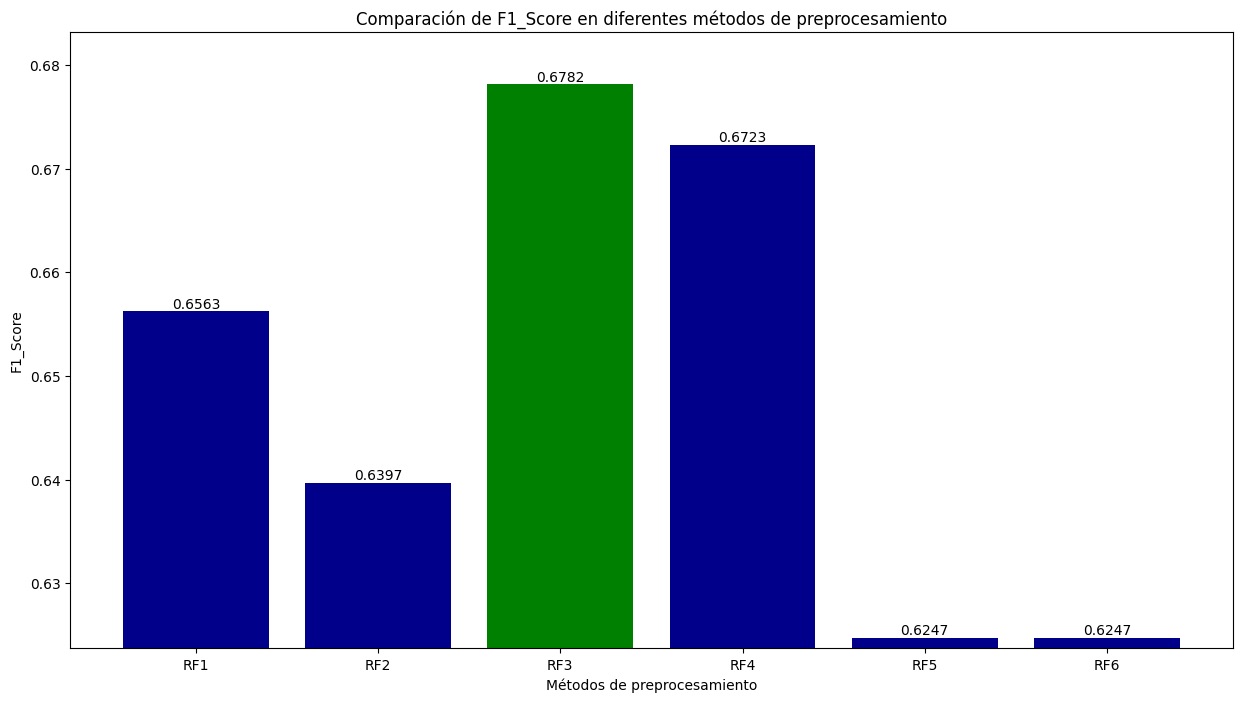

In [ ]:
# Celda 5
import matplotlib.pyplot as plt

f1_score = [f1_score_RF1,f1_score_RF2, f1_score_RF3,f1_score_RF4, f1_score_RF5,f1_score_RF6]
labels = ["RF1","RF2", "RF3", "RF4", "RF5",  "RF6" ]

max_mse_index = f1_score.index(max(f1_score))
bar_colors = ["darkblue" if i != max_mse_index else "green" for i in range(len(f1_score))]
plt.figure(figsize=(15, 8))

plt.bar(labels, f1_score, color=bar_colors)
plt.xlabel("Métodos de preprocesamiento")
plt.ylabel("F1_Score")
plt.title("Comparación de F1_Score en diferentes métodos de preprocesamiento")

# lim eje y
min_f1_score = min(f1_score)
max_f1_score = max(f1_score)
for x, y in zip(labels, f1_score):
    plt.annotate(str(round(y, 4)), xy=(x, y), ha='center', va='bottom')

padding = 0.001
plt.ylim(min_f1_score - padding, max_f1_score + 0.005)

plt.show()

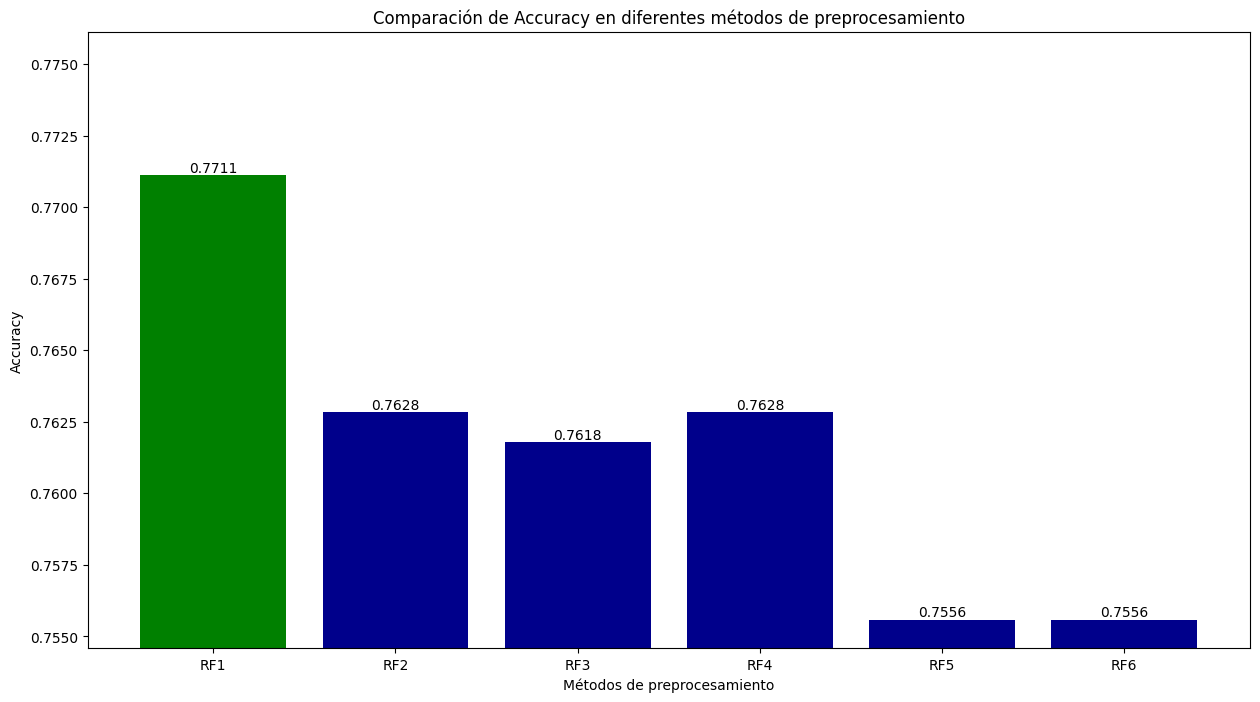

In [ ]:
accuracy = [accuracy_RF1,accuracy_RF2, accuracy_RF3,accuracy_RF4, accuracy_RF5,accuracy_RF6]
labels = ["RF1","RF2", "RF3", "RF4", "RF5",  "RF6" ]

max_mse_index = accuracy.index(max(accuracy))
bar_colors = ["darkblue" if i != max_mse_index else "green" for i in range(len(accuracy))]
plt.figure(figsize=(15,8))

plt.bar(labels, accuracy, color=bar_colors)
plt.xlabel("Métodos de preprocesamiento")
plt.ylabel("Accuracy")
plt.title("Comparación de Accuracy en diferentes métodos de preprocesamiento")

# lim eje y
min_accuracy = min(accuracy)
max_accuracy = max(accuracy)
for x, y in zip(labels, accuracy):
    plt.annotate(str(round(y, 4)), xy=(x, y), ha='center', va='bottom')

padding = 0.001
plt.ylim(min_accuracy - padding, max_accuracy + 0.005)

plt.show()

| RF  | Modelo                                             | Accuracy |F1_Score |
|--------|----------------------------------------------------|----------|----------|
|    RF1   | Random Forest (CountVectorizer)                    |  0.7711  |  0.6563    |
|    RF2   | Random Forest (CountVectorizer (lowercase=False))  |  0.7628  |  0.6397    |
|    RF3   | Random Forest (CountVectorizer(stop_words='english'))                    |  0.7618  |  0.6782    |
|    RF4   | Random Forest (CountVectorizer (stop_words='english',lowercase=False))  |  0.7628  |  0.6723    |
|    RF5   | Random Forest (CountVectorizer (analyzer=split_into_lemmas))  |  0.7556  |  0.6247    |
|    RF6   | Random Forest (CountVectorizer (stop_words='english',analyzer=split_into_lemmas))  |  0.7556  |  0.6247    |

Al analizar los resultados, podemos ver que el mejor modelo en términos de accuracy es el Modelo RF1, que utiliza CountVectorizer. Este modelo obtuvo un accuracy de 0.7711, lo que indica que hizo la mayor cantidad de predicciones correctas en general.

En cuanto al F1 score, el mejor modelo es el Modelo RF3, que utiliza CountVectorizer y la eliminación de Stopwords. Este modelo obtuvo un F1 score de 0.68. La ventaja de este modelo es que al eliminar las palabras comunes (stopwords) que no aportan información significativa al texto, se puede mejorar el rendimiento del modelo al reducir el ruido y la dimensionalidad del conjunto de datos.

Vale la pena señalar que la eliminación de stop words mejoró el puntaje F1 pero no afectó el accuracy, lo que podría indicar que las stop words podrían haber causado cierto ruido en las métricas de precisión y en el recall, pero no afectaron significativamente el performance general de las predicciones.


Los modelos con el 'peor' desempeño en términos de F1 Score y accuracy son los Modelos RF5 y RF6, que utilizan CountVectorizer y Lematización con verbos, y en el caso de RF6 también la eliminación de stopwords. Ambos modelos obtuvieron un accuracy de 0.76 y un F1 score de 0.62. La lematización puede ser útil en algunos casos, pero en este contexto, donde se analizan tweets, la lematización con verbos puede no ser suficiente para capturar la información necesaria para mejorar el rendimiento del modelo. Además, el proceso de lematización puede aumentar la complejidad y el tiempo de procesamiento, lo que puede ser una desventaja en comparación con otros enfoques.

En resumen, la eliminación de stopwords parece ser una técnica útil para mejorar el rendimiento del modelo de clasificación de sentimientos en este caso, en términos de equilibrio entre precisión y recall (F1 Score). La lematización con verbos, por otro lado, no parece aportar mejoras significativas en el rendimiento del modelo y podría agregar complejidad adicional al proceso de preprocesamiento. Sin embargo, si solo consideramos el accuracy, el modelo básico con CountVectorizer resulta ser el más eficaz.


**Nota sobre diferencia entre métricas de performance:**
El accuracy similar en todos los modelos indica que todos clasifican de manera similar el total de instancias. Sin embargo, el cambio en el puntaje F1 revela diferencias en cómo manejan precisión y recall, especialmente con datos desequilibrados. Algunos modelos podrían ser mejores identificando la clase minoritaria o manejar mejor el ruido en los datos. Esto destaca la importancia de usar varias métricas de evaluación, ya que el accuracy por si solo puede ser engañosa en conjuntos de datos desequilibrados.